In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Problema 1
Vamos praticar gerar matrizes e fazer operações com as linhas e colunas:

(a) Crie uma matriz A com as dimensões (5, 4) e elementos aleatórios variando entre 0 e 50, com o 50 incluso;

__Dica:__ Utilize as funções `np.random.randint` e `np.reshape`

(b) Retorne a média do vetor

(c) Retorne os menores valores de cada coluna;

(d) Retorne os maiores valores de cada linha.

In [12]:
# A
matriz = np.random.randint(0,51,20).reshape(5,4)
matriz

array([[44,  7, 30,  0],
       [26, 34, 34, 23],
       [36, 50, 31, 17],
       [ 7, 18,  9, 48],
       [46, 46,  3, 39]])

In [13]:
# B
matriz.mean()

27.4

In [15]:
# C
matriz.min(axis=0)

array([7, 7, 3, 0])

In [17]:
# D
matriz.max(axis=1)

array([44, 34, 50, 48, 46])

### Problema 2

Crie um objeto DataFrame que contenha os dados da tabela abaixo, os quais se referem ao peso, altura e idade de cinco pessoas:


| Peso (kg) | Altura (cm) | Idade (anos) |
|-----------|-------------|--------------|
|  47 | 161	| 31 |
|  80 | 170	| 21 |
|  60 | 175	| 16 |
|  90 | 162	| 28 |
| 100 | 185	| 23 |
| 147 | 189 | 32 |

Com base no DataFrame criado, realize o que for pedido nos itens abaixo:

(a) Visualize apenas os dados da coluna que contém a altura das pessoas;

(b) Obtenha a idade média das pessoas;

(c) Obtenha os dados das pessoas que estão abaixo da altura média;

(d) Crie um nova coluna no DataFrame que contenha o IMC (Índice de Massa Corporal) de cada pessoa;

__Obs.:__ A fórmula para o IMC é dada por IMC = Peso/(Altura)² com o peso em kg e a altura em metros.

(e) Remova a coluna que contém a idade das pessoas;

(f) Crie uma nova coluna chamada Classificação, que contenha a classificação de cada indivíduo, de acordo com o seu IMC. Para isso, consulte a tabela abaixo.

| IMC             | Classificação |
|-----------------|---------------|
Menor que 18,5    | Subpeso |
Entre 18,5 e 24,9 | Normal |
Entre 25,0 e 29,9 | Sobrepeso |
Entre 30,0 e 39,9 | Obesidade Grau I |
Maior que 40,0    | Obesidade Grau II |

(g) Salve esses dados do DataFrame em um arquivo csv.

In [55]:
# Essa função cria um data frame através dos dados da área de transferência
df = pd.read_clipboard()

In [56]:
df

,Peso (kg),Altura (cm),Idade (anos)
0,47,161,31
1,80,170,21
2,60,175,16
3,90,162,28
4,100,185,23
5,147,189,32


In [57]:
#(a) Visualize apenas os dados da coluna que contém a altura das pessoas
df[['Altura (cm)']]

,Altura (cm)
0,161
1,170
2,175
3,162
4,185
5,189


In [58]:
#(b) Obtenha a idade média das pessoas;
df['Idade (anos)'].mean()

25.166666666666668

In [59]:
#(c) Obtenha os dados das pessoas que estão abaixo da altura média;
altura_media = df['Altura (cm)'].mean()
df[df['Altura (cm)'] < altura_media]

,Peso (kg),Altura (cm),Idade (anos)
0,47,161,31
1,80,170,21
3,90,162,28


In [60]:
#(d)Crie um nova coluna no DataFrame que contenha o IMC (Índice de Massa Corporal) de cada pessoa
#Obs.: A fórmula para o IMC é dada por IMC = Peso/(Altura)² com o peso em kg e a altura em metros.
df['imc'] = df['Peso (kg)']/ ((df['Altura (cm)']/100)**2)

In [61]:
df

,Peso (kg),Altura (cm),Idade (anos),imc
0,47,161,31,18.13
1,80,170,21,27.68
2,60,175,16,19.59
3,90,162,28,34.29
4,100,185,23,29.22
5,147,189,32,41.15


In [62]:
#(e) Remova a coluna que contém a idade das pessoas;
df.drop(['Idade (anos)'],axis=1,inplace=True)
df

,Peso (kg),Altura (cm),imc
0,47,161,18.13
1,80,170,27.68
2,60,175,19.59
3,90,162,34.29
4,100,185,29.22
5,147,189,41.15


In [63]:
#(f) Crie uma nova coluna chamada Classificação, que contenha a classificação de cada indivíduo, de acordo com o seu IMC. Para isso, consulte a tabela abaixo.
df['classificacao'] = pd.cut(df['imc']
                             ,bins=[0,18.5,24.9,29.9,39.9,np.inf]
                             ,labels = ['Subpeso','Normal','Sobrepeso','Obesidade Grau I','Obesidade Grau II']
                            )
df

,Peso (kg),Altura (cm),imc,classificacao
0,47,161,18.13,Subpeso
1,80,170,27.68,Sobrepeso
2,60,175,19.59,Normal
3,90,162,34.29,Obesidade Grau I
4,100,185,29.22,Sobrepeso
5,147,189,41.15,Obesidade Grau II


In [64]:
#(g) Salve esses dados do DataFrame em um arquivo csv.
df.to_csv('resposta_questao_2_g.csv')

### Problema 3

O arquivo avocado.xlsx consiste em um dataset que contém dados sobre vendas de abacates  em diversas regiões dos Estados Unidos. Essa dataset contém as seguintes colunas:

| Coluna | Descrição |
|--------|-----------|
| Date | data da observação |
| AveragePrice | preço médio de um único abacate |
| year | ano |
| region | cidade ou região da observação |
| Total Volume | volume total de abacates vendidos |

Além das informações acima, contidas no arquivo avocado.xlsx, o tipo do abacate (convencional ou orgânico) também seria uma informação importante para a sua análise. Suponhamos que você conseguiu essas informações para cada uma das observações do arquivo avocado.csv, na mesma ordem, e salvou-as no arquivo avocado_type.xlsx. Portanto, tudo o que você precisa é juntar esses dois arquivos em um mesmo DataFrame.

Com o DataFrame criado, obtenha o que é solicitado nos itens elencados abaixo:




In [141]:
# lê tabela principal
avocado = pd.read_csv('./data/avocado.csv', sep = ';')
# lê tabela de tipo e adiciona coluna na tabela principal
avocado_type = pd.read_excel('./data/avocado_type.xlsx')
avocado['type'] = avocado_type

In [142]:
avocado.head()

,Date,AveragePrice,Total Volume,year,region,type
0,2015-12-27,1.33,"64,236.62",2015,Albany,orgânico
1,2015-12-20,1.35,"54,876.98",2015,Albany,convencional
2,2015-12-13,0.93,"118,220.22",2015,Albany,convencional
3,2015-12-06,1.08,"78,992.15",2015,Albany,orgânico
4,2015-11-29,1.28,"51,039.60",2015,Albany,orgânico


(a) A quantidade de abacates do tipo convecional e do tipo orgânico.

In [143]:
print('convencional :', avocado[avocado['type'] == 'convencional'].value_counts().sum())
print('orgânico :', avocado[avocado['type'] == 'orgânico'].value_counts().sum())

convencional : 9114
orgânico : 9135



(b) A quantidade de registros (linhas) de abacates vendidos para cada região ordenada da maior venda para a menor.

In [144]:
avocado['faturamento'] = avocado['AveragePrice'] * avocado['Total Volume']
avocado.groupby('region').sum().sort_values(by=['faturamento'], ascending=False)

,AveragePrice,Total Volume,year,faturamento
region,,,,
TotalUS,445.83,"5,864,740,181.80",681458,"6,387,593,101.34"
California,471.62,"1,028,981,653.17",681458,"1,121,414,026.51"
West,430.01,"1,086,779,155.75",681458,"1,066,833,656.04"
Northeast,541.45,"713,280,909.56",681458,"960,007,873.70"
SouthCentral,372.22,"1,011,279,618.83",681458,"874,059,289.26"
Southeast,472.53,"615,238,409.11",681458,"703,630,581.04"
GreatLakes,452.43,"589,642,549.29",681458,"688,661,844.27"
Midsouth,474.81,"508,349,357.20",681458,"615,723,838.99"
LosAngeles,411.01,"507,896,547.63",681458,"484,227,610.41"


(c) Para que todos os labels das colunas fiquem padronizados, renomeie aqueles que estão iniciando em letra minúscula para que iniciem em letra maiúscula, trocando espaço por _ e adicionando _ como separação de texto.

In [145]:
avocado.columns = avocado.columns.str.replace(' ', '_').str.capitalize()
avocado.head()

,Date,Averageprice,Total_volume,Year,Region,Type,Faturamento
0,2015-12-27,1.33,"64,236.62",2015,Albany,orgânico,"85,434.70"
1,2015-12-20,1.35,"54,876.98",2015,Albany,convencional,"74,083.92"
2,2015-12-13,0.93,"118,220.22",2015,Albany,convencional,"109,944.80"
3,2015-12-06,1.08,"78,992.15",2015,Albany,orgânico,"85,311.52"
4,2015-11-29,1.28,"51,039.60",2015,Albany,orgânico,"65,330.69"


(d) Essa dado possui duplicados? Se sim, remova-os do dataset.

In [146]:
avocado.isna().sum()

Date            0
Averageprice    0
Total_volume    0
Year            0
Region          0
Type            0
Faturamento     0
dtype: int64

(e) Retire dos dados a região 'TotalUS'

In [147]:
avocado.drop(avocado[avocado['Region'] == 'TotalUS'].index, inplace = True)
avocado.head(2)

,Date,Averageprice,Total_volume,Year,Region,Type,Faturamento
0,2015-12-27,1.33,"64,236.62",2015,Albany,orgânico,"85,434.70"
1,2015-12-20,1.35,"54,876.98",2015,Albany,convencional,"74,083.92"


(f) Apresente as regiões que mais venderam abacate em todo o período em ordem decrescente.

In [162]:
avocado.groupby('Region')[['Total_volume']].sum().sort_values(by='Total_volume', ascending=False)

,Total_volume
Region,
West,"1,086,779,155.75"
California,"1,028,981,653.17"
SouthCentral,"1,011,279,618.83"
Northeast,"713,280,909.56"
Southeast,"615,238,409.11"
GreatLakes,"589,642,549.29"
Midsouth,"508,349,357.20"
LosAngeles,"507,896,547.63"
Plains,"311,188,529.11"


(g) Calcule o volume total de abacates vendidos para cada tipo e ano.

In [149]:
avocado.groupby(['Type', 'Year'])[['Total_volume']].sum()

Total_volume
Type         Year                 
convencional 2015 1,405,835,526.60
             2016 1,538,913,526.12
             2017 1,505,463,914.14
             2018   433,710,441.83
orgânico     2015 1,322,377,914.02
             2016 1,462,817,222.93
             2017 1,564,148,221.75
             2018   425,395,644.21

(h) existe alguma região que foi a maior responsável pela queda na produção de 2018?

In [150]:
avocado_18 = avocado[avocado['Year'] == 2018]
avocado_18.groupby('Region')[['Total_volume']].sum().sort_values(by = 'Total_volume').head(1)

,Total_volume
Region,
Syracuse,"1,046,987.66"


(i) Qual cidade menos faturou com a venda de abacates?

In [153]:
avocado.groupby('Region')[['Faturamento']].sum().sort_values(by = 'Faturamento', ascending = True).head(1)

,Faturamento
Region,
Syracuse,"15,205,192.60"


### Problema 4

Com base no dataset 'Video_Games_Sales.csv' responda:


In [154]:
game_sale = pd.read_csv('./data/Video_Games_Sales.csv', sep = ';')
game_sale.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,"2,006.00",Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.00,51.00,8.00,322.00,Nintendo,E
1,Super Mario Bros.,NES,"1,985.00",Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.00,73.00,8.30,709.00,Nintendo,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.00,73.00,8.00,192.00,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


#### (a) Quantos jogos existem em cada genero?

In [163]:
game_sale.groupby('Genre')[['Genre']].count()

,Genre
Genre,
Action,3370
Adventure,1303
Fighting,849
Misc,1750
Platform,888
Puzzle,580
Racing,1249
Role-Playing,1500
Shooter,1323


#### (b) Temos duplicados nesses dados? E nulos?

In [167]:
game_sale.duplicated().sum()
# Sem duplicados

0

In [779]:
print(f'Valores nulos para cada coluna:\n{game_sale.isna().sum()}')
print('\nTotal de valores nulos: ', game_sale.isna().sum().sum())

Valores nulos para cada coluna:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Total de valores nulos:  49141


#### (c) Quantos jogos de cada publisher receberam nota acima de 9 na avaliação dos usuarios?

In [196]:
score_9 = game_sale[game_sale['User_Score'] > 9]

In [201]:
print(score_9.count().max(),'jogos no total')

184 jogos no total


In [203]:
print('Jogos por Publisher:')
score_9.groupby('Publisher')[['User_Score']].count().sort_values(by = 'User_Score', ascending = False)

Jogos por Publisher:


,User_Score
Publisher,
Nintendo,20
Electronic Arts,19
Activision,16
Konami Digital Entertainment,10
THQ,10
Tecmo Koei,9
Capcom,9
Vivendi Games,8
Atari,7


#### (d) Faça uma tabela que mostre o total vendido por ano por pais/globalmente de cada publisher? Você consegue observar algum padrão? Como se comportaram as vendas na América do Norte (NA) ao longo do tempo? O mesmo foi visto nos demais lugares? 

In [775]:
# Venda de jogos por ano por país/global
game_year = game_sale.groupby(['Year_of_Release'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
game_publisher = game_sale.groupby(['Publisher'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

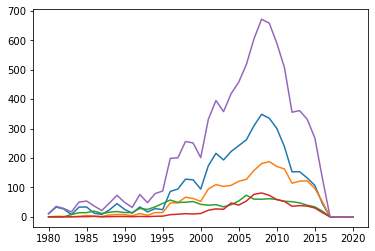

In [776]:
plt.plot(game_year)
plt.show()

# Vendas na América do Norte (Azul) teve uma escalada em vendas a partir de 1995 com pico entre 2005 e 2010 e uma queda
# acentuada até 2020. O resto do mundo seguiu o mesmo padrão.
# Roxo = Global
# Azul = NA
# Laranja = Europa
# Verde = Japão
# Vermelho - Outros

___
___

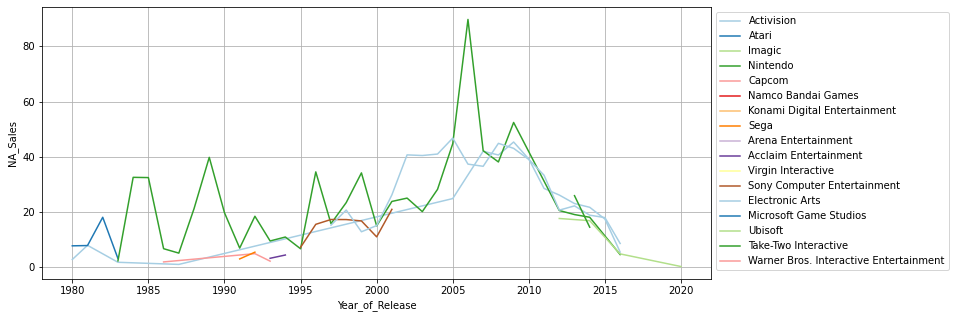

In [777]:
#vendas de 10% ou mais ao ano por publicador
na_sale = game_sale.groupby(['Year_of_Release','Publisher'])[['NA_Sales']].sum()
na_sale_copy = na_sale.copy()

na_sale['%'] = na_sale[['NA_Sales']] / game_sale.groupby(['Year_of_Release'])[['NA_Sales']].sum()
na_sale.reset_index(inplace = True)
na_sale['%'].fillna(0, inplace = True)
na_sale.loc[na_sale['%'] < 0.10,'Publisher'] = None
na_sale = na_sale.groupby(['Year_of_Release','Publisher'])[['NA_Sales','%']].sum()
na_sale.reset_index(inplace = True)

#plotagem do gráfico
plt.figure(figsize=(12,5))
sns.lineplot(data=na_sale, x='Year_of_Release', y='NA_Sales', hue='Publisher', palette='Paired')
plt.grid()
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()

#### (e) Qual foi jogo mais vendido na união européia? De que ano ele é e qual a editora?

In [490]:
print(game_sale.sort_values(by = 'EU_Sales', ascending = False).loc[0, 'Name'])
print(game_sale.sort_values(by = 'EU_Sales', ascending = False).loc[0, 'Year_of_Release'])
print(game_sale.sort_values(by = 'EU_Sales', ascending = False).loc[0, 'Publisher'])

Wii Sports
2006.0
Nintendo


#### (f) Quantos % os generos ['Racing', 'Sports', 'Shooter'] representam na base de dados? 

In [493]:
game_genre = game_sale.groupby('Genre')[['Name']].count()
game_genre['prop'] = 100 * game_genre / game_genre.sum()
game_genre.rename({'Name': 'qty'}, axis = 1, inplace = True)
game_genre.reset_index(inplace = True)
game_genre

,Genre,qty,prop
0,Action,3370,20.16
1,Adventure,1303,7.79
2,Fighting,849,5.08
3,Misc,1750,10.47
4,Platform,888,5.31
5,Puzzle,580,3.47
6,Racing,1249,7.47
7,Role-Playing,1500,8.97
8,Shooter,1323,7.91
9,Simulation,874,5.23


In [494]:
filt = ((game_genre['Genre'] == 'Racing') | (game_genre['Genre'] == 'Sports') | (game_genre['Genre'] == 'Shooter'))
game_genre[filt]

,Genre,qty,prop
6,Racing,1249,7.47
8,Shooter,1323,7.91
10,Sports,2348,14.05


In [498]:
print('Total:',round(game_genre[filt]['prop'].sum(), 2),'%')

Total: 29.43 %


#### (g) Qual plataforma vendeu menos globalmente? obs: imprimir somente o nome

In [499]:
game_sale.groupby('Platform', as_index = False)[['Global_Sales']].sum().sort_values(by='Global_Sales').iloc[0, 0]

'PCFX'

### Problema 5
A pasta 'data/datasus' contém informações sobre casos de dengue e tabelas auxiliares. <br>

| Tabela | Conteúdo |
|--------|----------|
| Dengue | Quantidade de casos por município |
| Agua | Quantidade de residências em cada município por tipo o abastecimento de água |
| InstalacoesSanitarias | Quantidade de residências em cada município por tipo de rede de esgoto |
| Pib | PIB per capita de cada município |
| Municipios | Relaciona o id_municipio com seu nome e estado |
| Populacao | Quantidade de pessoas morando em áreas urbanas, rurais e população total por município |
| Sexo | Quantidade de pessoas por sexo em cada município |


In [765]:
municipio = pd.read_csv('data/datasus/Municipios.csv')
m2 = pd.read_csv('data/datasus/Municipios.csv')
dengue = pd.read_csv('data/datasus/Dengue.csv')
instalacoes = pd.read_csv('data/datasus/InstalacoesSanitarias.csv')
populacao = pd.read_csv('data/datasus/Populacao.csv')
pib = pd.read_csv('data/datasus/Pib.csv')

municipio = municipio.merge(dengue, how='left', on='id_municipio')
municipio = municipio.merge(populacao, how='left', on='id_municipio')
municipio.drop(['id_registro_x','id_registro_y'],inplace=True,axis=1)
municipio = municipio.merge(instalacoes[['id_municipio', 'nao_possui']], how='left', on='id_municipio')
municipio.rename({'urbana':'pop_urb'
                 ,'rural':'pop_rur'
                 ,'total':'pop_tot'
                 ,'casos':'casos_dengue'
                 ,'nao_possui':'casas_sem_rede_esgoto'}, axis=1, inplace=True)
municipio.head(3)

,id_municipio,municipio,UF,casos_dengue,pop_urb,pop_rur,pop_tot,casas_sem_rede_esgoto
0,1,110001 Alta Floresta D'Oeste,RO,10.00,"13,806.00","10,248.00","24,054.00",791.00
1,2,110037 Alto Alegre dos Parecis,RO,5.00,"3,622.00","9,136.00","12,758.00",576.00
2,3,110040 Alto Paraíso,RO,6.00,"8,185.00","8,913.00","17,098.00",507.00


#### (a) Calcular o número de casos de dengue por cada estado apresentando os dados em ordem decrescente.

In [766]:
# realizado tratamento para municípios onde os casos de dengue estavam maior que a população total
# Goiás estava com um valor muito alto
municipio['casos_dengue_filt'] = np.where(
     municipio['casos_dengue'] > municipio['pop_tot'], municipio['pop_tot'], municipio['casos_dengue']
)
municipio.head(2)

,id_municipio,municipio,UF,casos_dengue,pop_urb,pop_rur,pop_tot,casas_sem_rede_esgoto,casos_dengue_filt
0,1,110001 Alta Floresta D'Oeste,RO,10.00,"13,806.00","10,248.00","24,054.00",791.00,10.00
1,2,110037 Alto Alegre dos Parecis,RO,5.00,"3,622.00","9,136.00","12,758.00",576.00,5.00


In [767]:
municipio.groupby(['UF'])[['casos_dengue_filt','pop_tot']].sum().sort_values(by='casos_dengue_filt',ascending=False)

,casos_dengue_filt,pop_tot
UF,,
GO,"37,838.00","5,957,776.00"
MG,"15,932.00","19,468,167.00"
CE,"11,373.00","8,354,221.00"
MT,"7,750.00","2,990,974.00"
SP,"5,173.00","40,943,200.00"
ES,"5,046.00","3,492,640.00"
PA,"4,525.00","7,524,921.00"
PI,"3,472.00","3,102,196.00"
MA,"3,374.00","6,547,249.00"


#### (b) Utilizando o dataset InstalacoesSanitarias.csv, determine o número de pessoas que não possuem meio sanitário algum de descarte de dejetos por estado.

In [768]:
# realizado tratamento para municípios onde as casas sem rede de esgoto estavam maior que a população total
# Goiás novamente com um valor muito alto
municipio['casas_sem_rede_esgoto_filt'] = np.where(
     municipio['casas_sem_rede_esgoto'] > municipio['pop_tot'], municipio['pop_tot']/2.9, municipio['casas_sem_rede_esgoto']
)
municipio.head(2)

,id_municipio,municipio,UF,casos_dengue,pop_urb,pop_rur,pop_tot,casas_sem_rede_esgoto,casos_dengue_filt,casas_sem_rede_esgoto_filt
0,1,110001 Alta Floresta D'Oeste,RO,10.00,"13,806.00","10,248.00","24,054.00",791.00,10.00,791.00
1,2,110037 Alto Alegre dos Parecis,RO,5.00,"3,622.00","9,136.00","12,758.00",576.00,5.00,576.00


In [769]:
# 2.9 média de pessoas de cada família brasileira
municipio['pessoas_sem_instalacao'] = municipio['casas_sem_rede_esgoto_filt'] * 2.9
municipio.groupby('UF')[['casas_sem_rede_esgoto_filt','pessoas_sem_instalacao','pop_tot']].sum().sort_values(by='pessoas_sem_instalacao', ascending = False)

,casas_sem_rede_esgoto_filt,pessoas_sem_instalacao,pop_tot
UF,,,
BA,"1,135,345.14","3,292,500.90","13,934,971.00"
MA,"805,628.21","2,336,321.80","6,547,249.00"
CE,"624,748.14","1,811,769.60","8,354,221.00"
PI,"473,623.45","1,373,508.00","3,102,196.00"
PE,"432,241.03","1,253,499.00","8,742,708.00"
PA,"306,028.00","887,481.20","7,524,921.00"
MG,"250,660.48","726,915.40","19,468,167.00"
PB,"214,645.41","622,471.70","3,743,095.00"
AM,"211,491.00","613,323.90","3,463,804.00"


#### (c) Crie uma coluna com a posição de ranking considerando o PIB. Os maiores PIB devem ter os menores valores de ranking.

In [770]:
pib = pib.sort_values(by='pib_percapta', ascending = False)
pib.reset_index(inplace = True)
pib['rank'] = np.arange(1, pib.shape[0]+1)
pib

,index,id_registro,id_municipio,pib_percapta,rank
0,3152,3153,3155,"715,193.70",1
1,2962,2963,2965,"340,688.49",2
2,3574,3575,3577,"278,145.26",3
3,3230,3231,3233,"255,658.30",4
4,5163,5164,5169,"254,242.69",5
...,...,...,...,...,...
5554,617,618,618,"3,566.34",5555
5555,2106,2107,2109,"3,561.71",5556
5556,563,564,564,"3,529.10",5557
5557,643,644,644,"3,510.69",5558


#### (d) Qual o PIB dos 5 municípios com mais casos de dengue e sua posição no ranking?

In [771]:
pib.head(2)

,index,id_registro,id_municipio,pib_percapta,rank
0,3152,3153,3155,"715,193.70",1
1,2962,2963,2965,"340,688.49",2


In [772]:
municipio.head(1)

,id_municipio,municipio,UF,casos_dengue,pop_urb,pop_rur,pop_tot,casas_sem_rede_esgoto,casos_dengue_filt,casas_sem_rede_esgoto_filt,pessoas_sem_instalacao
0,1,110001 Alta Floresta D'Oeste,RO,10.00,"13,806.00","10,248.00","24,054.00",791.00,10.00,791.00,"2,293.90"


In [773]:
municipio = municipio.merge(pib[['id_municipio','pib_percapta','rank']], how='left', on='id_municipio')
municipio.head(2)

,id_municipio,municipio,UF,casos_dengue,pop_urb,pop_rur,pop_tot,casas_sem_rede_esgoto,casos_dengue_filt,casas_sem_rede_esgoto_filt,pessoas_sem_instalacao,pib_percapta,rank
0,1,110001 Alta Floresta D'Oeste,RO,10.00,"13,806.00","10,248.00","24,054.00",791.00,10.00,791.00,"2,293.90","13,231.01","2,664.00"
1,2,110037 Alto Alegre dos Parecis,RO,5.00,"3,622.00","9,136.00","12,758.00",576.00,5.00,576.00,"1,670.40","13,222.71","2,666.00"


In [774]:
municipio.sort_values(by='casos_dengue_filt', ascending=False).head()[['municipio', 'casos_dengue_filt', 'pib_percapta', 'rank']]

,municipio,casos_dengue_filt,pib_percapta,rank
5565,522200 Vianópolis,"12,476.00","26,445.72",905.00
5336,520085 Americano do Brasil,"5,488.00","19,774.03","1,572.00"
5412,520810 Formoso,"4,848.00","29,034.21",742.00
948,230435 Forquilha,"4,321.00","19,494.40","1,602.00"
5214,510325 Colniza,"3,298.00","31,016.19",641.00
